In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('/gdrive/My Drive/dl-pytorch/')

In [0]:
!ls '/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS'

test_signs  train_signs  val_signs


In [0]:
import os 
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [0]:
class SIGNSDataset(Dataset):
  "Ejemplo de como construir un dataset de imagenes"
  def __init__(self, base_dir, split="train", transform=None):
    path = os.path.join(base_dir, "{}_signs".format(split))
    files = os.listdir(path)
    self.filenames = [os.path.join(path, f) for f in files if f.endswith(".jpg")]
    
    self.targets = [f[0] for f in files]
    self.transform = transform
    
  def __len__(self):
    return len(self.filenames)
  
  def __getitem__(self, idx):
    image = Image.open(self.filenames[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]

In [0]:
signs = SIGNSDataset('/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS')

In [0]:
len(signs)

864

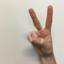

In [0]:
signs[0][0]

In [0]:
signs[0][1]

'2'

In [0]:
trainset = SIGNSDataset('/gdrive/My Drive/dl-pytorch/datasets/64x64_SIGNS',transform=transforms.ToTensor())

In [0]:
trainset[0][0]

In [0]:
dataloader = DataLoader(trainset,batch_size=32)

In [0]:
from plot_helpers import imshow
from torchvision.utils import make_grid

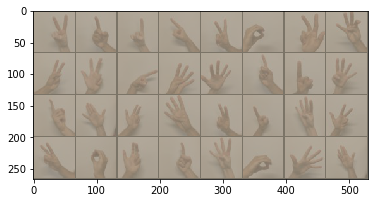

('2', '1', '1', '1', '2', '0', '3', '4', '2', '3', '1', '4', '5', '1', '1', '4', '1', '5', '3', '4', '2', '1', '4', '3', '2', '0', '3', '1', '4', '0', '5', '5')


In [0]:
for inputs, targets in dataloader:
  out = make_grid(inputs)
  imshow(out)
  print(targets)
  break